<h1>CSCE670 Spring 2020 Spotlight</h1>
<h4>Submitted By: Sanjeev Kumar Singh</h4>

<h1>1. Movie Lense Dataset Walkthrough </h1>
We are going to learn about one of biggest openly available dataset for movie recommendation, MovieLens. This is provided by GroupLens Research Group in Department of Computer Science and Engineering at the University of Minnesota, Twin Cities. 
<h2>1.1 Types of MovieLens Dataset: </h2>
    <h3> MovieLens Tag Genome Dataset: </h3> This datasets is attributed with tags such as atmospheric, thought-provoking, realistic, etc. So if someone wants to find similar movie that he has watched he should be looking at this dataset.
This dataset includes 11 million computed tag-movie relevance scores from a pool of 1,100 tags applied to 10,000 movies. Released 3/2014.
    <h3> MovieLens 25M Dataset: </h3> ml-25m describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.
    <h3> MovieLens 1B Synthetic Dataset: </h3> MovieLens 1B is a synthetic dataset that is expanded from the 20 million real-world ratings from ML-20M, distributed in support of MLPerf.
    <h3> MovieLens 1M Dataset: </h3>MovieLens (ml-1m) 1M movie ratings. Stable benchmark dataset. 1 million ratings from 6000 users on 4000 movies. Released 2/2003. These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.
I will be using ml-1m dataset for further analysis as it is relatively similar to work with. However, formats for all the datasets from MovieLes is same. Therefore, the methods written here can be directly used for other datasets as well.

<h2>1.2 About MovieLens 1M Dataset(ml-1m)</h2>

ml-1m can be downloaded from here [MovieLens dataset](http://files.grouplens.org/datasets/movielens/ml-1m.zip)
The downloaded zip folder contains a readme explaing the role of different files which briefly discussed as following:
* **users.dat**: Information abput the a user is given in the format of **UserID::Gender::Age::Occupation::Zip-code**. In __readme__ file it is explained about the range of different age-groups and occupations possible. 
* **movies.dat**: Information of each movie is given in this file in the format of **MovieID::Title::Genres**. Movie titles are identical to title from IMDB except that the year is added. We have removed year to better reflect the actual names of the movies. 
* **ratings.dat**: Ratings are given in this file in the format of **UserID::MovieID::Rating::Timestamp**. UserID varies from 1 to 6040 and movieID varies from 1 to 3952. Each rating is an integer between 1 to 5. Here time unit is seconds and each user has atleast 20 ratings.

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>1.3 DataReader  Class: </h2>

DataReader helps us read and parse the data from the raw dataset. Three private methods: **_read_movies**, **_read_users**, and **_read_ratings** read the respective files and parse the corrosponding inforation. For using this method user only needs to provide the *basepath*. After parsing is completed the parsed data can be obtained with **get_data** method

In [2]:
class DataReader:
    def __init__(self, data_dir='ml-1m'):
        self.data_path = data_path
        self.movies = None
        self.movie_to_id = None
        self.users = None
        self.ratings = None
        self.timestamps = None
        self._read_movies()
        self._read_users()
        self._read_ratings()
    
    def get_data(self):
        return self.users, self.movies, self.movie_to_id, self.ratings, self.timestamps

    def _read_movies(self):
        path = os.path.join(data_path, 'movies.dat')
        if os.path.exists(path):
            movie_list = {}
            movie_to_id = {}
            count = 0
            with open(path, 'r') as f:
                for line in f:
                    count += 1
                    splits = line.strip().split('::')
                    movieID = int(splits[0])
                    #if count != movieID:
                    #    print(movieID)
                    movie_genres = set(splits[2].split('|'))
                    name, year = splits[1][:-6], splits[1][-5:-1]
                    
                    movie_list[movieID] = {}
                    movie_list[movieID]['name'] = name
                    movie_list[movieID]['year'] = year
                    movie_list[movieID]['genres'] = movie_genres
            self.movies = movie_list
            self.movies_to_id = movie_to_id
        else:
            print('Could not find path of movies.dat')

    def _read_users(self):
        path = os.path.join(data_path, 'users.dat')
        if os.path.exists(path):
            users = {}
            with open(path, 'r') as f:
                for line in f:
                    splits = line.strip().split('::')
                    userID, gender, age, occupation, zip_code = int(splits[0]), splits[1], int(splits[2]), int(splits[3]), splits[4]

                    users[userID] = {}
                    users[userID]['gender'] = gender
                    users[userID]['age'] = age
                    users[userID]['occupation'] = occupation
                    users[userID]['zip_code'] = zip_code
            self.users = users
        else:
            print('Could not find path of users.dat')

    def _read_ratings(self):
        path = os.path.join(data_path, 'ratings.dat')
        if os.path.exists(path):
            ratings = pd.read_csv(path, sep='::', engine='python', names=['user_id', 'movie_id', 'rating', 'timestamp'])
            self.ratings = ratings[['user_id', 'movie_id', 'rating']]
            self.timestamps = ratings[['user_id', 'movie_id', 'timestamp']]
        else:
            print('Could not find path of ratings.dat')

<h3> 1.4 Reading the data</h3>

In [3]:
data_path = 'ml-1m'
movie_lens = DataReader(data_path)

<h3>1.5 Printing the number of users and movie with some basic preview of rating matrix</h3>

In [4]:
users, movies, movie_to_id, ratings, timestamps = movie_lens.get_data()
print('Num of users: ', len(users))
print('Num of movies: ', len(movies))
print('Shape of ratings (users, movies): ', ratings.shape)
print("Preview of ratings")
print(ratings.head())

Num of users:  6040
Num of movies:  3883
Shape of ratings (users, movies):  (1000209, 3)
Preview of ratings
   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


<h2>2. Data Visualizations: </h2>
<h3>2.1 Distribution for different ratings: </h3>

Here we present some statistics about the ratings provided.

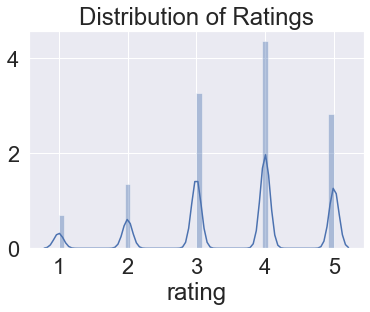

Mean Rating:  3.581564453029317


In [5]:
sns.set_style('darkgrid')
sns.set(font_scale=2)

sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))
plt.title('Distribution of Ratings')
plt.show()
print("Mean Rating: ", ratings['rating'].mean())

**Note:** As we see that mean rating is 3.58. It says that users are generous in their ratings. A simple recommendation system would be to predict all the ratings as 4 closest to global mean.

<h2>2.2 Age Distribution of Users </h2>
In the MovieLens Dataset we also have the information about the age group of each indivisual users. We will display the distribution. Here we need build the dictinary with different age-groups mannauly as it is not provided in the proper format in the dataset.

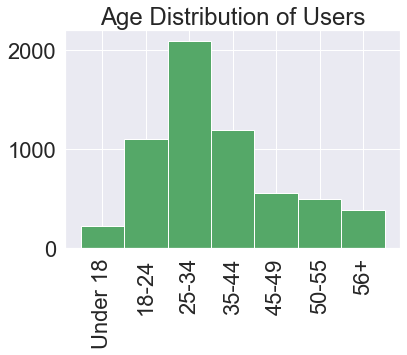

In [6]:
ageid_to_range = {
                    1:  "Under 18",
                    18:  "18-24",
                    25:  "25-34",
                    35:  "35-44",
                    45:  "45-49",
                    50:  "50-55",
                    56:  "56+"
            }
age_range_to_id = {range_: idx for idx, range_ in ageid_to_range.items()}
#print("Age splits for users:")
#for idx, range_ in ageid_to_range.items():
#    print(range_)

age_dist = {id_: 0 for id_ in ageid_to_range}
for u_id in users:
    user = users[u_id]
    age_dist[user['age']] += 1

d = {ageid_to_range[id_] : val for id_, val in age_dist.items()}
plt.bar(list(d.keys()), d.values(), color='g', align='center', width=1)
plt.xticks(rotation=90)
plt.title('Age Distribution of Users')
plt.show()

<h2>2.3 Gender Distribution of Users </h2>

In the MovieLens Dataset we also have the information about the gender of each user. Here we display the user distribution according to different gender. The MovieLen dataset has only 2 gender that is **male** and **female**

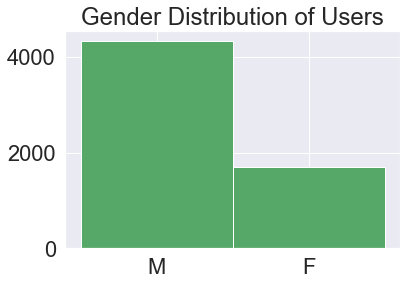

In [7]:
gender_dist = {gender_ : 0 for gender_ in ['M', 'F']}
for u_id in users:
    user = users[u_id]
    gender_dist[user['gender']] += 1

d = gender_dist
plt.bar(list(d.keys()), d.values(), color='g', align='center', width=1)
plt.xticks(rotation=0)
plt.title('Gender Distribution of Users')
plt.show()

<h2>2.4 Occupation Distribution of Users </h2>
In the MovieLens Dataset we also have the information about the occupation of each user. It may be important to study the trend with users of particular interest. For example users with technical background might like the sci-fy movies etc. We will display the distribution as well but first here we build the dictinary with different personal occupations of users present in the dataset.

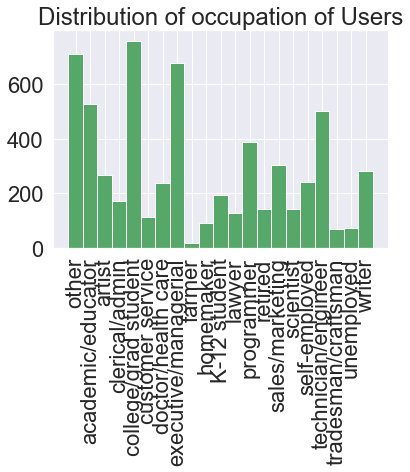

In [8]:
occ_id_to_occ = {
                    0:  "other", 1:  "academic/educator", 2:  "artist", 3:  "clerical/admin", 4:  "college/grad student",
                    5:  "customer service", 6:  "doctor/health care", 7:  "executive/managerial", 8:  "farmer",
                    9:  "homemaker", 10:  "K-12 student", 11:  "lawyer", 12:  "programmer",
                    13:  "retired", 14:  "sales/marketing", 15:  "scientist", 16:  "self-employed",
                    17:  "technician/engineer", 18:  "tradesman/craftsman", 19:  "unemployed", 20:  "writer"
                  }
occ_to_id = {idx: occ_ for idx, occ_ in occ_id_to_occ.items()}
#print("Occupations of users in the dataset:")
#for idx, occ_ in occ_id_to_occ.items():
#    print(occ_)

occupation_dist = {occ_id_ : 0 for occ_id_ in occ_id_to_occ}
for u_id in users:
    user = users[u_id]
    occupation_dist[user['occupation']] += 1

d = {occ_id_to_occ[id_] : val for id_, val in occupation_dist.items()}
plt.bar(list(d.keys()), d.values(), color='g', align='center', width=1)
plt.xticks(rotation=90)
plt.title('Distribution of occupation of Users')
plt.show()

<h2>2.5 Genre Distribution of Movies </h2>
Genre is definitely an important factor for a movie. If a user likes a particular genre and he has given high rating to a movie from this genre, it is highly likely that he will also like the other movies from this genre and will give high rating to it. Here we build the dictionary of all the genres present in the MovieLens dataset and display movie wise distribution.

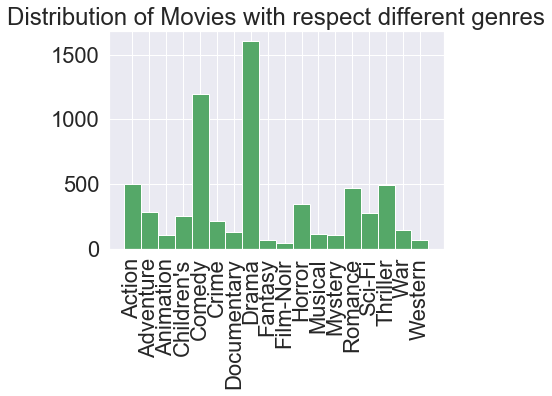

In [9]:
genres = ['Action', 'Adventure', 'Animation', "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
genre_to_id = {genre_: idx for idx, genre_ in enumerate(genres)}
genreid_to_genre = {idx: genre_ for idx, genre_ in enumerate(genres)}
#print("All Movie Genres:")
#for idx, genre_ in genreid_to_genre.items():
#    print(genre_)

genre_dist = {genre_id_ : 0 for genre_id_ in genreid_to_genre}
for m_id in  movies:
    movie = movies[m_id]
    for g_ in movie['genres']:
        genre_dist[genre_to_id[g_]] += 1

d = {genreid_to_genre[id_] : val for id_, val in genre_dist.items()}
plt.bar(list(d.keys()), d.values(), color='g', align='center', width=1)
plt.xticks(rotation=90)
plt.title('Distribution of Movies with respect different genres')
plt.show()

<h2>3. Building Basic Recommendation System </h2>
Here we will build our basic similarity based collaborative filtering method for movie recomendation system on MovieLens Data. The idea behind this aproach is that there is a correlation between ratings of similar user and similarly with the movies. For example, if user A and user B are nearby in some space then their ratings will also be near by. Similary if movie X and movie Y are nearby then their ratings will also be similar. For example all the Marvel Movies are mostly highly rated because they have some kind of similarity.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt

<h3>3.1 Preprocessing </h3>

We fill the unavailable user or movies ids with __0__, because it is easier to ignore those ids this way. Also, We fill the not available or missing values with the global mean of ratings.

In [11]:
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

<h3>3.2 Sampling of Dataset </h3>

Since the MovieLens data is big and it was difficult to perform further calculations I have sampled only 20% of the entire data. We have used __train_test_split__ provided by sklearn 

In [12]:
ratings_ = ratings.sample(frac=0.02)
train_data, test_data = train_test_split(ratings_, test_size=0.2)
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.values
test_data_matrix = test_data.values

# Check their shape
print("Train Data Shape: ", train_data_matrix.shape)
print("Test Data Shape: ", test_data_matrix.shape)

Train Data Shape:  (16003, 3)
Test Data Shape:  (4001, 3)


<h3>3.3 Calculating Pairwise Similarity Score</h3>

We need to calculate similarity for all the user-user pair and all the movie-movie pair. With high number of users this really becomes large and memory hungry. This is the reason we need to prune that data in above step. We have used __pairwise_distance__ function provided by sklearn for this task.

In [13]:
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0

<h3>3.4 Calculating the Missing Ratings</h3>

As we disucssed above the similarity based collaberative filtering can be of two types.
* __Item - Item Collaborative Filtering__:  In this mehtod we calculate the similarity between each movie-movie pair and use this calculate the rating of a new movie. First we find a similar movie that has been watch by that user and use that rating as a new rating.
* __User User Collaborative Filtering__: In this method we build the similarity between each user-user pair and use this to calculate the rating for a new user for a unknown movie if that movie is watched by some other user. Here one change is that each user might have their own bias, therefore we calculate the __user_bias__ as well and only use the diff for the similarity.

In [14]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

<h3>3.5 Evaluation Metric</h3>

For evaluation in recommendation systems, we use the root mean square error to see how much our predicted ratings differ cumulatively than the actual ones.

In [15]:
def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

<h3>3.6 Testing </h3>

We have used earlier held out __test_data_matrix__ for testing our recommendation models.

In [16]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1431.720908498793
Item-based CF RMSE: 1641.637274843616


__Note:__ Here, the RMSE values that we have got is more (not optimal) because we have trained only fraction of data due to memory constraint. Here we have not done any optimization and our approach was to show the basic collaborative filtering based recommendor.

<h1>Summary</h1>
    
* We have demonstrated how to work with MovieLens Dataset.
* We show some interesting statistics about the user's age, occupation and gender distribution.
* We also show some statistics about the genres of movies. Note that if we count number of movies by the genre it will be more. This is because each movies, can have more than genre present in it.
* At the end we show the basic collaborative filtering based recommendation system which uses user-user or item-item similarity matrix to calculate the predicted score.

<h1>References: </h1>

* [MovieLens dataset](https://grouplens.org/datasets/movielens/)
* [MovieLens Website](https://movielens.org/)
* F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872
* Recommendation System Lectures From : http://courses.cse.tamu.edu/caverlee/csce670/schedule.html
* [Introduction to Recommendor Systems](https://github.com/khanhnamle1994/movielens)
* Scikit-Learn: https://scikit-learn.org/stable/index.html
* Pandas: https://pandas.pydata.org/
* For visualization: https://seaborn.pydata.org/